# Analysis of domain name popularity in African countries

We scraped the data from https://www.alexa.com/topsites/countries. To be able to retrieve historical data, we used the Way back Machine downloader https://github.com/hartator/wayback-machine-downloader.

We retrieved Alexa top 50 pages from 2009 to 2019.

In this analysis, we are going to study 5 African countries namely: South Africa, Nigeria, Kenya, Egypt and DRC

## Part 1: Parsing the data

In [283]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import itertools
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

markers = [",","v","o","p",".","s","+","D","1","2","3","4","P","h","H"]

names_dict = {'google': '<',
         'facebook': '>',
         'youtube': '*',
         'yahoo':'X',
         'live':'d',
         'wikipedia': '8',
         'twitter' : '+',
         'instagram': 'p',
         'amazon': 's',
          'netflix': '1'
        }

wa = ['BF','BJ','CI','CV','GH','GM','GN','GW','LR','ML','NE','NG','SL','SN','TD','TG']
ea = ['BI','DJ','ER','ET','KE','RW','SO','TZ','UG']
na = ['DZ','EG','EH','LY','MA','MR','SD','SS','TN']
sa = ['AO','BW','LS','MW','MZ','NA','SZ','ZA','ZM','ZW']
ca = ['CD','CF','CG','CM','GA','GQ','ST']
io = ['KM','MG','MU','RE','SC','YT']

ccs = [
'EG', 'BJ', 'CI', 'CV', 'GH', 'GM', 'GN', 'GW', 'AO', 'CF', 'CG', 'CM', 'GA', 'GQ', 'TD', 'BI', 'DJ', 'ER', 'ET', 'KM', 'BW', 'MA', 'SD', 'TN', 'LR', 'ML', 'MR', 'NE', 'NG', 'SL', 'SN', 'TG', 'ST', 'KE', 'MG', 'MU', 'MW', 'MZ', 'RE', 'RW', 'SC', 'SO', 'UG', 'LS', 'NA', 'SZ', 'ZA', 'DZ', 'EH', 'LY', 'BF', 'SH', 'CD', 'TZ', 'YT', 'ZM', 'ZW']


def buildplot(df, cc):
    
    df = df.loc[df.cc == cc]
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    websites = df.name.drop_duplicates()
    
    #get only the websites not in names_dict
    websites = list(set(websites) ^ set(names_dict.keys()))

    i=0
    local_names = []
    for name in websites[:10]:
        data = df.loc[df.name == name].sort_values(by=['month'])
    #     ax = data.plot(ax=ax, kind='line', x='date', y='kmax', label=label)
        l1, = ax.plot(data.month.values, data.ranking.values, marker=markers[i], label=name, linewidth=2)
        local_names.append(l1)
        i=i+1
    
    global_names = []
    for name in names_dict.keys():
        data = df.loc[df_mode.name == name].sort_values(by=['month'])
    #     ax = data.plot(ax=ax, kind='line', x='date', y='kmax', label=label)
        l2, = ax.plot(data.month.values, data.ranking.values, marker=names_dict[name], label=name, linestyle='dashed', linewidth=2)
        global_names.append(l2)
        
    # Format the x axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

    # # round to nearest years.
    datemin = np.datetime64(df.month.values[0], 'Y')
    datemax = np.datetime64(df.month.values[-1], 'Y') 
    ax.set_xlim(datemin, datemax)
    fig.autofmt_xdate()

    plt.ylabel('Ranking')
    plt.xlabel('Year')
    plt.grid()
    plt.rc('axes', titlesize=12)
    #plt.xticks(rotation='vertical')
    #plt.gca().invert_yaxis()

    plt.title('Alexa Top 50 in ' + cc)
    
    lab1 = websites[:10]
    lab2 = names_dict.keys()
    
    leg1 = plt.legend(local_names,lab1, loc=1, title="Local")
    leg2 = plt.legend(global_names,lab2, loc=2, title='Global')
    
    plt.gca().add_artist(leg1)
    
    #plt.legend(loc='best')
    plt.savefig('plots/alexa_ranking_' +  cc + '.png')
    plt.show()    

In [80]:
df = pd.read_csv('data/alexatop50_2009_2019_raw.csv', keep_default_na=False)
df['name'] = df.apply(lambda x: x.domain.split('.')[0], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df.sort_values(by=['date','cc','ranking'], inplace=True)
#df = df.loc[df.ranking < 51] ##only take the top50
#df.drop_duplicates(['date','name'], keep='first', inplace=True)
#df.index = df['date'] 
df.to_csv('data/alexatop50_2009_2019.csv', index=False)
df.loc[df.cc == 'NA'].head()

,date,ranking,domain,cc,name,year
241903,2017-05-19 14:52:49,1,google.com.na,NA,google,2017
241904,2017-05-19 14:52:49,2,google.com,NA,google,2017
241905,2017-05-19 14:52:49,3,youtube.com,NA,youtube,2017
241906,2017-05-19 14:52:49,4,facebook.com,NA,facebook,2017
241907,2017-05-19 14:52:49,5,yahoo.com,NA,yahoo,2017


In [147]:
df = pd.read_csv('data/alexatop50_2009_2019.csv', keep_default_na=False, parse_dates=['date'])

In [148]:
df['month'] = df['date'].dt.floor('d') - pd.offsets.MonthBegin(1)

In [ ]:
df.loc[df.name=='google'].loc[df.cc=='ZA'].sort_values(by='date')

In [235]:
df_mode = df.groupby([df.name, df.month, df.cc], as_index=False)[['ranking']].agg(lambda x: pd.Series.mode(x)[0])
df_mode.head()

,name,month,cc,ranking
0,aabbir,2016-11-01,MA,23
1,aabbir,2017-02-01,MA,33
2,aabbir,2017-05-01,MA,29
3,aabbir,2017-06-01,MA,33
4,aabbir,2017-07-01,MA,29


In [236]:
df_mode.sort_values(by=['month', 'name', 'ranking'], inplace=True)

In [257]:
df_mode.loc[df_mode.name == 'dstv'].loc[df_mode.cc=='ZA']

,name,month,cc,ranking
6970,dstv,2017-05-01,ZA,38
6971,dstv,2017-06-01,ZA,28
6972,dstv,2017-07-01,ZA,27
6973,dstv,2017-08-01,ZA,24
6981,dstv,2018-03-01,ZA,10
6982,dstv,2018-04-01,ZA,9
6986,dstv,2019-04-01,ZA,5
6992,dstv,2019-05-01,ZA,8
6998,dstv,2019-06-01,ZA,8
7004,dstv,2019-07-01,ZA,8


### Alexa Top Ranking in Africa

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


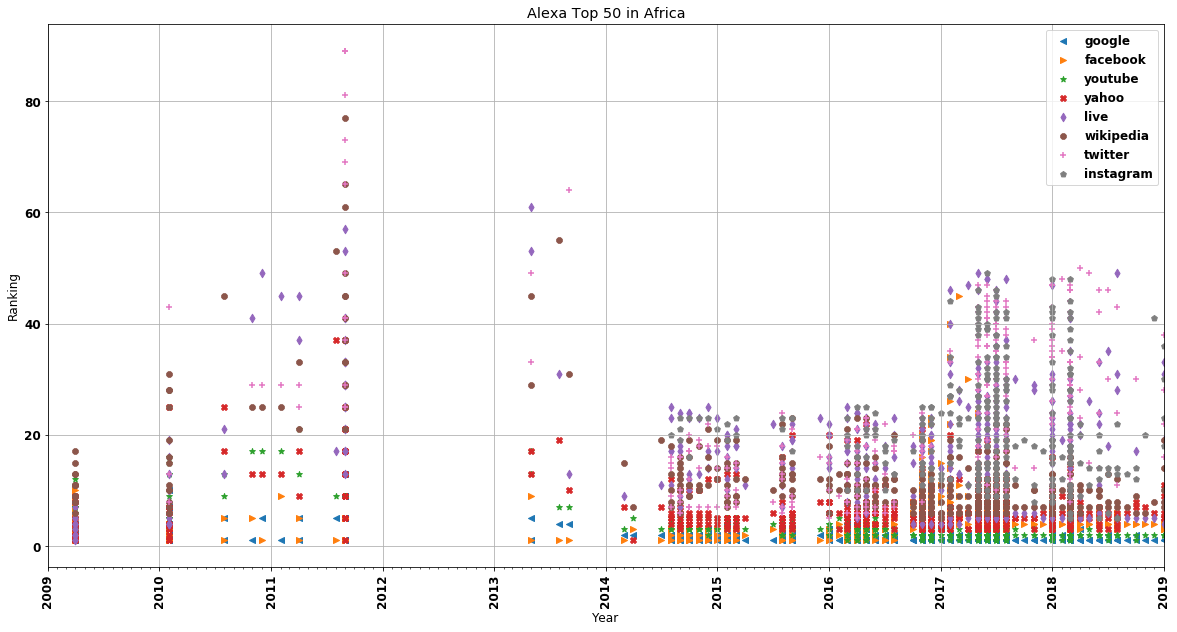

In [256]:
fig, ax = plt.subplots(figsize=(20, 10))

for name in names_dict.keys():
    data = df_mode.loc[df_mode.name == name].sort_values(by=['month'])
#     ax = data.plot(ax=ax, kind='line', x='date', y='kmax', label=label)
    ax.scatter(data.month.values, data.ranking.values, marker=names_dict[name], label=name)

# Format the x axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# # round to nearest years.
datemin = np.datetime64(df_mode.month.values[0], 'Y')
datemax = np.datetime64(df_mode.month.values[-1], 'Y') 
ax.set_xlim(datemin, datemax)  


plt.ylabel('Ranking')
plt.xlabel('Year')
plt.grid()
plt.xticks(rotation='vertical')
#plt.gca().invert_yaxis()

plt.title('Alexa Top 50 in Africa')
plt.legend(loc='best')
plt.savefig('plots/alexa_ranking_africa.png')
plt.show()    

### Alexa Top Ranking in ZA, NG, KE, CD, GH, EG

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


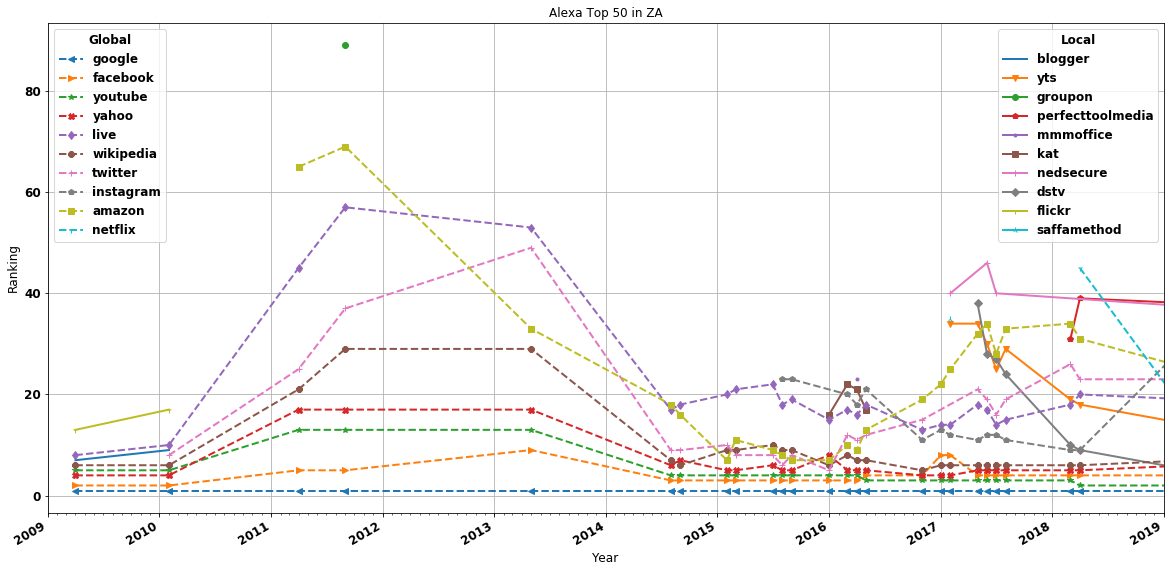

In [284]:
buildplot(df_mode, 'ZA')

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


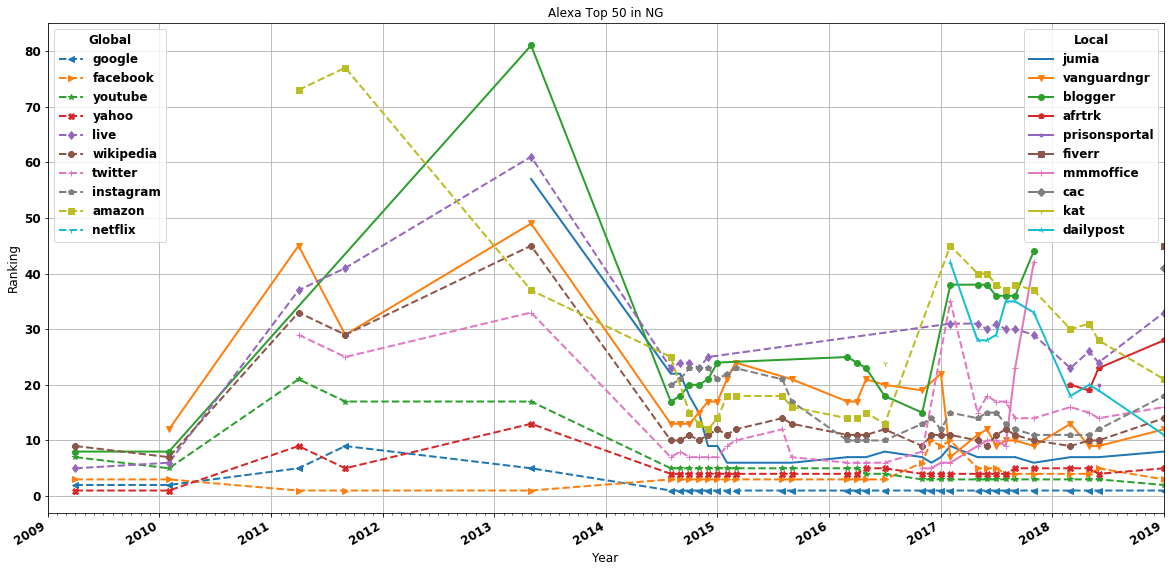

In [285]:
buildplot(df_mode, 'NG')

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


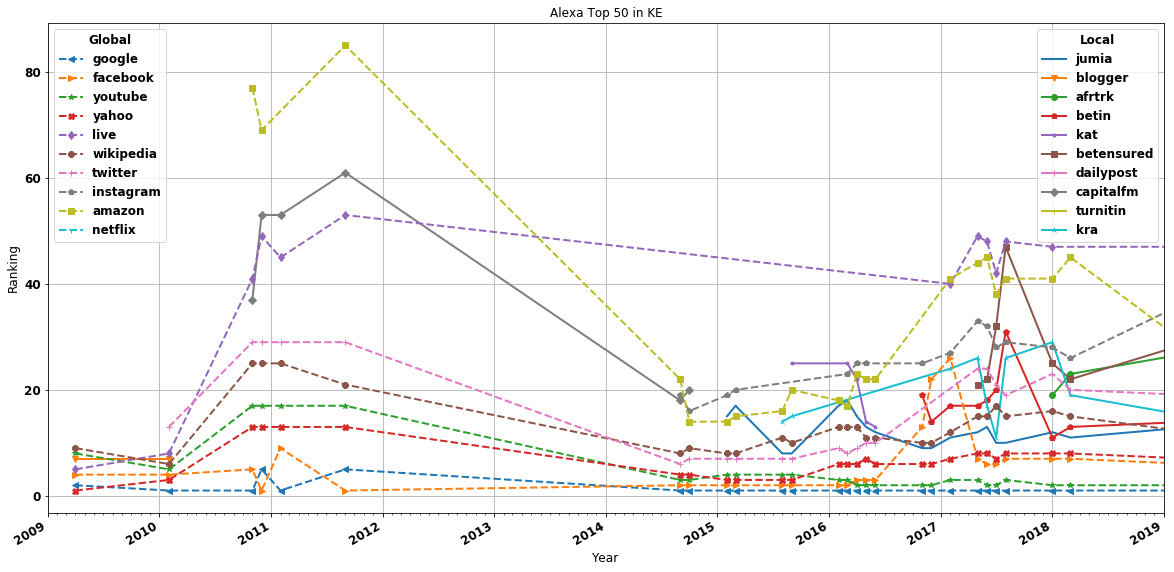

In [286]:
buildplot(df_mode, 'KE')

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


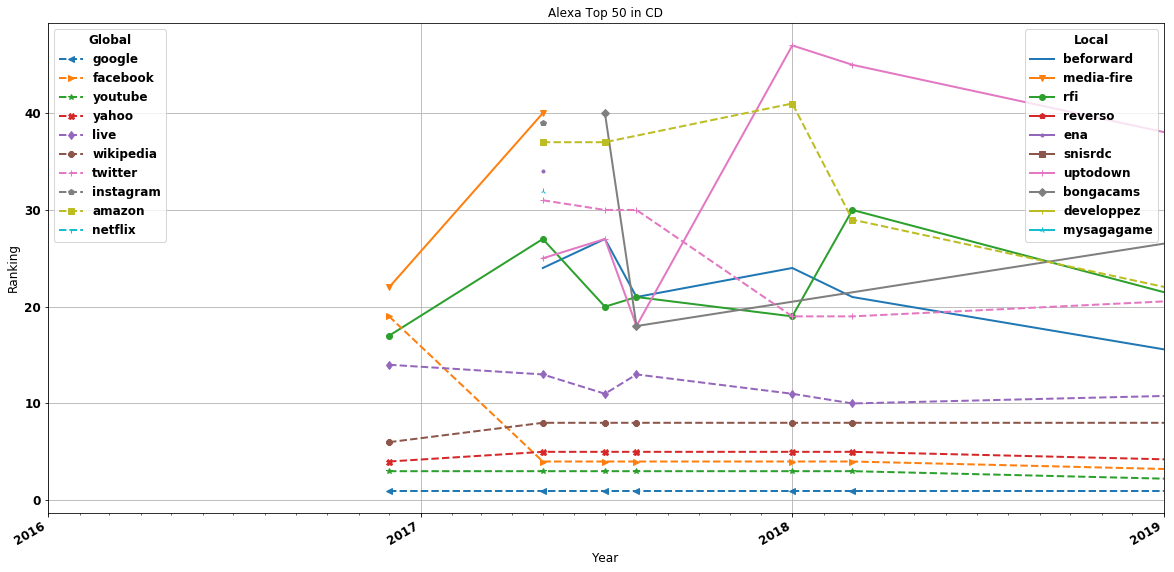

In [287]:
buildplot(df_mode, 'CD')

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


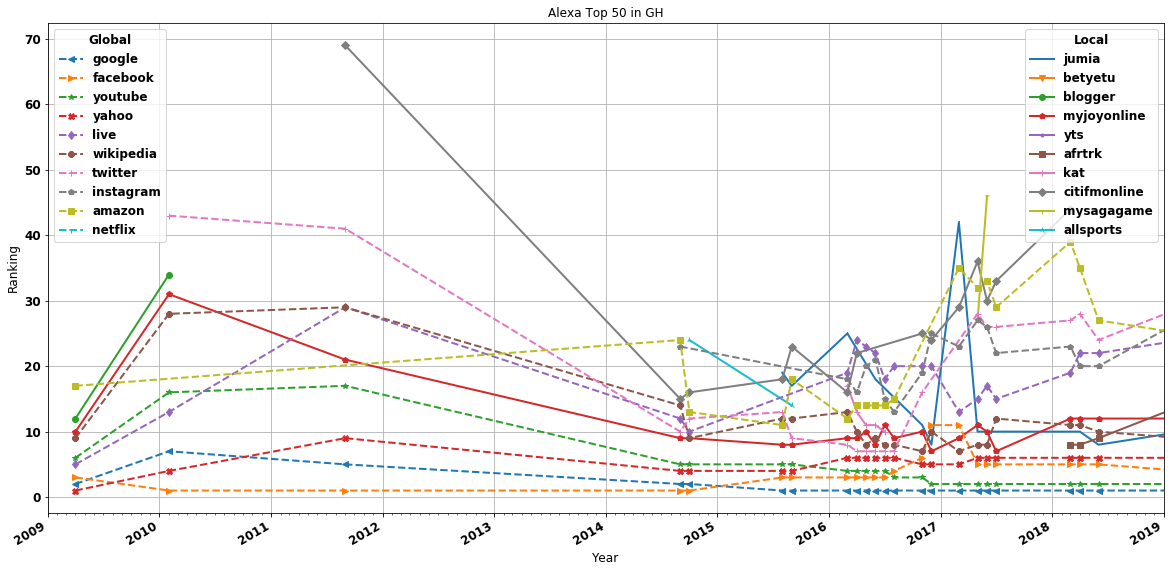

In [288]:
buildplot(df_mode, 'GH')

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


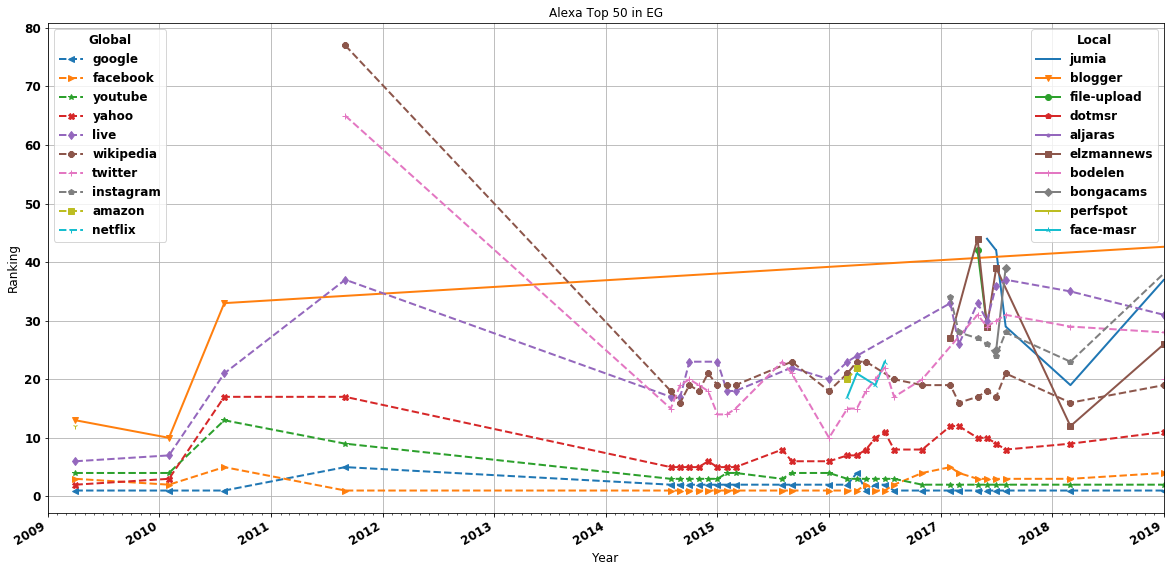

In [289]:
buildplot(df_mode, 'EG')

## Part 2: Some first plots of popularity
First we need to compute the median ranking by year. We select only the top10 websites i.e. we select only rows with 

In [41]:
df_count = df.groupby([df.year], as_index=False)[['name']].count()
df_count

,year,name
0,2009,541
1,2010,792
2,2011,3928
3,2013,343
4,2014,1656
5,2015,2126
6,2016,6468
7,2017,37007
8,2018,19660
9,2019,176146


In [42]:
#df_top_10 = df[df.ranking < 21]
df_median = df.groupby([df.name, df.year], as_index=False)[['ranking']].median()
df_mode = df.groupby([df.name, df.year], as_index=False)[['ranking']].agg(lambda x: pd.Series.mode(x)[0])
df_mode.head()

,name,year,ranking
0,aabbir,2016,23
1,aabbir,2017,29
2,aabbir,2018,28
3,aabbir,2019,37
4,aau,2017,28


In [43]:
df_median.sort_values(by=['year','ranking'],ascending=True, inplace=True)
df_mode.sort_values(by=['year','ranking'],ascending=True, inplace=True)

In [44]:
allyears_indexed = df_mode.set_index(['name', 'year']).sort_index()
allyears_indexed.head()

ranking
name   year         
aabbir 2016       23
       2017       29
       2018       28
       2019       37
aau    2017       28

In [45]:
allyears_indexed.loc['live'].index

Int64Index([2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='year')

In [46]:
def plotname(name, marker):
    data = allyears_indexed.loc[name]
    plt.plot(data.index, data.values, marker=marker)

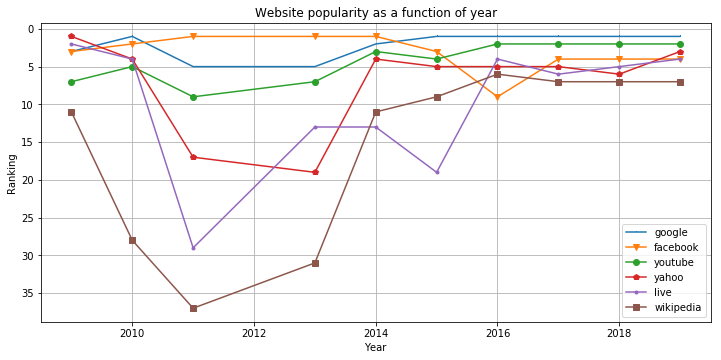

In [47]:
plt.figure(figsize = (12, 5.5))

names = ['google', 'facebook', 'youtube', 'yahoo', 'live', 'wikipedia']

i=0
for name in names:
    plotname(name, markers[i])
    i=i+1

plt.legend(names)
plt.grid()
plt.gca().invert_yaxis()
plt.title('Website popularity as a function of year')
plt.ylabel('Ranking')
plt.xlabel('Year')
plt.savefig('plots/website_popularity.png')
plt.show()

## Stacked plots

In [48]:
variants = allyears_indexed.loc[names].unstack(level = 0, fill_value = 0)
variants

ranking                                    
name facebook google live wikipedia yahoo youtube
year                                             
2009        3      3    2        11     1       7
2010        2      1    4        28     4       5
2011        1      5   29        37    17       9
2013        1      5   13        31    19       7
2014        1      2   13        11     4       3
2015        3      1   19         9     5       4
2016        9      1    4         6     5       2
2017        4      1    6         7     5       2
2018        4      1    5         7     6       2
2019        4      1    4         7     3       2

In [49]:
variants = variants.reindex(columns = names, level = 1)
variants

ranking                                      
name  google facebook youtube yahoo live wikipedia
year                                              
2009       3        3       7     1    2        11
2010       1        2       5     4    4        28
2011       5        1       9    17   29        37
2013       5        1       7    19   13        31
2014       2        1       3     4   13        11
2015       1        3       4     5   19         9
2016       1        9       2     5    4         6
2017       1        4       2     5    6         7
2018       1        4       2     6    5         7
2019       1        4       2     3    4         7

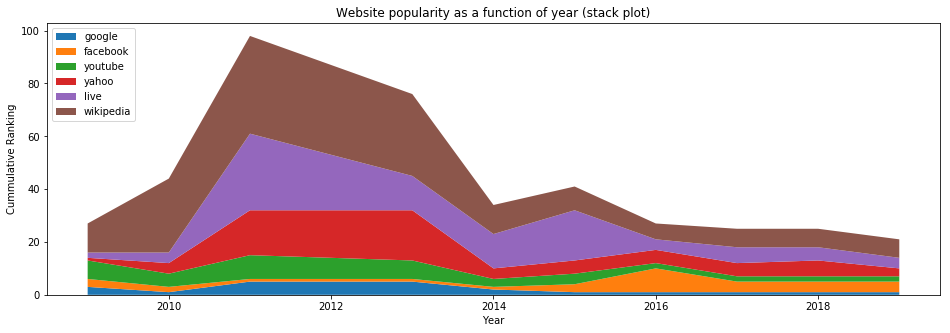

In [50]:
plt.figure(figsize = (16, 5))

plt.stackplot(variants.index, variants.values.T, labels = names)
plt.legend(loc = 'upper left')
plt.title('Website popularity as a function of year (stack plot)')
plt.ylabel('Cummulative Ranking')
#plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.savefig('plots/website_popularity_stack_plot.png')
plt.show()

### CDF plots

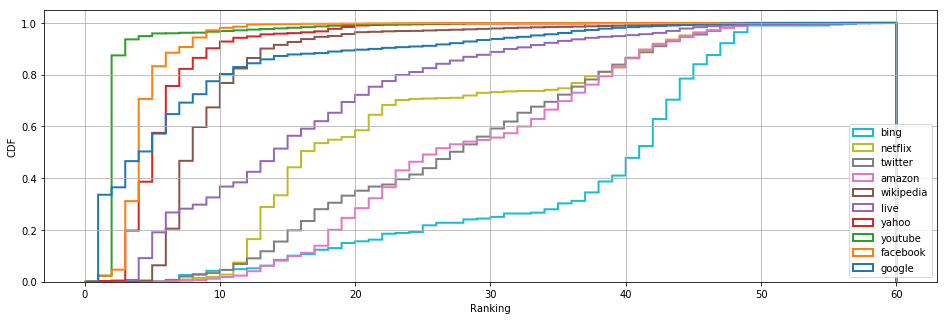

In [51]:
n_bins = 5000

fig, ax1 = plt.subplots(figsize=(16, 5))

names = ['google', 'facebook', 'youtube', 'yahoo', 'live', 'wikipedia', 'amazon', 'twitter', 'netflix', 'bing']

linestyles = ['solid','dashed']
#plot the cumulative histogram
n, bins, patches = ax1.hist([df.loc[df.name == 'google'].ranking.values, 
                            df.loc[df.name == 'facebook'].ranking.values, 
                            df.loc[df.name == 'youtube'].ranking.values,
                            df.loc[df.name == 'yahoo'].ranking.values,
                             df.loc[df.name == 'live'].ranking.values,
                             df.loc[df.name == 'wikipedia'].ranking.values,
                             df.loc[df.name == 'amazon'].ranking.values,
                             df.loc[df.name == 'twitter'].ranking.values,
                             df.loc[df.name == 'netflix'].ranking.values,
                             df.loc[df.name == 'bing'].ranking.values
                            ], 
                           n_bins, density=1, histtype='step', linewidth=2, range=[0,60],
                           cumulative=True, label=names)
                                    
# tidy up the figure
ax1.grid(True)
ax1.legend(loc='lower right')
#ax1.set_title('Web URL')
ax1.set_xlabel('Ranking')
ax1.set_ylabel('CDF')

plt.savefig("plots/CDF_Website_ranking.png")
plt.show()

## Part 3: Yearly top ten websites
The following function sorts a given year's data by popularity and keeps only the top ten websites and ranking.

In [52]:
df_top10 = df.groupby([df.cc, df.name, df.year], as_index=False)[['ranking']].agg(lambda x: pd.Series.mode(x)[0])
df_top10.head()

,cc,name,year,ranking
0,AO,abola,2016,11
1,AO,abola,2017,12
2,AO,abola,2018,10
3,AO,abola,2019,11
4,AO,academia,2019,40


### topten by region

In [53]:
def topten(df, countries, years):
    array = []
    for year in years:
        #select by year and where cc is in region, sort by ranking
        df_res = df.loc[(df.year == year) & (df.cc.isin(countries))].sort_values(by='ranking',ascending=True)
        if (len(df_res) == 0):
            continue
        #select only name column and drop duplicates, also reset the index
        df_res = df_res.iloc[:,[1]].drop_duplicates().reset_index(drop=True)
        df_res.index = df_res.index + 1
        df_res.columns = [year]
        array.append(df_res[:10])
        
    return pd.concat(array, axis = 1)

In [54]:
def plotPopular(set, filename, region):
    plt.figure(figsize=(12,2.5))
    
    i=0
    for name in set:
        plotname(name, markers[i])
        i=i+1

    plt.legend(set)
    plt.grid()
    plt.title('The five most persistently popular websites from 2009 to 2019 (' + region + ')')
    plt.ylabel('Ranking')
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.savefig('plots/' + filename + '.png')
    plt.show()


#### All of Africa

In [55]:
df_top10_af = topten(df_top10, ccs, range(2009,2020))
df_top10_af

,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019
1,google,facebook,facebook,google,yahoo,google,google,youtube,youtube,google
2,yahoo,google,yahoo,facebook,google,facebook,youtube,google,google,youtube
3,live,yahoo,google,youtube,facebook,youtube,facebook,yahoo,caasimada,chouftv
4,facebook,youtube,youtube,yahoo,youtube,yahoo,yahoo,facebook,zimeye,yahoo
5,skyrock,live,live,live,hespress,hespress,onclickads,defimedia,facebook,facebook
6,msn,kooora,abidjan,alnilin,blogspot,ask,lexpress,hespress,tuko,defimedia
7,youtube,msn,leboncoin,ouedkniss,ask,mosaiquefm,jumia,tuko,yahoo,ouedkniss
8,sobika,wikipedia,bbc,blogspot,linkedin,avito,seneweb,standardmedia,hespress,abola
9,maktoob,abidjan,seneweb,gumtree,amazon,alnaharegypt,zimeye,zimeye,igihe,caasimada
10,kooora,myegy,ghanaweb,ask,twitter,el-balad,abola,ghanaweb,defimedia,nyasatimes


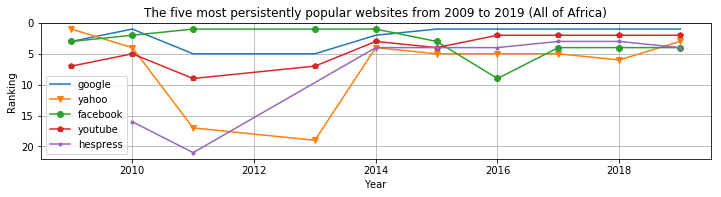

In [56]:
popular = df_top10_af.stack().value_counts().index[:5]
plotPopular(popular, 'top10_af', 'All of Africa')

#### Western Africa

In [57]:
df_top10_wa = topten(df_top10, wa, range(2009,2020))
df_top10_wa

,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019
1,live,facebook,facebook,facebook,google,google,google,google,google,google
2,yahoo,yahoo,google,google,facebook,facebook,youtube,youtube,youtube,youtube
3,google,google,yahoo,yahoo,yahoo,yahoo,facebook,yahoo,yahoo,yahoo
4,facebook,live,youtube,youtube,youtube,youtube,yahoo,facebook,facebook,facebook
5,msn,youtube,abidjan,blogspot,blogspot,jumia,abola,ghanaweb,seneweb,seneweb
6,youtube,abidjan,ghanaweb,nairaland,ask,ask,jumia,seneweb,ghanaweb,ghanaweb
7,abidjan,msn,blogspot,mywebsearch,twitter,ghanaweb,seneweb,orange-guinee,abola,abola
8,ghanaweb,wikipedia,myjoyonline,twitter,ghanaweb,blogspot,orange-guinee,senego,emansion,state
9,blogger,blogger,seneweb,amazon,abidjan,twitter,ghanaweb,state,senego,emansion
10,skyrock,nairaland,live,linkedin,tonaton,myjoyonline,bbc,malijet,malijet,malijet


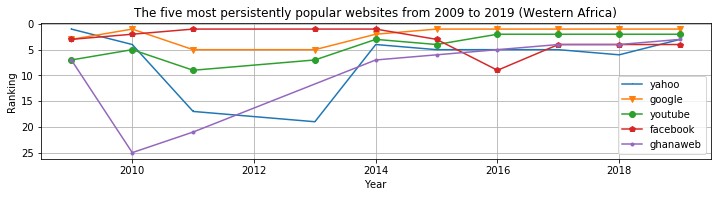

In [59]:
popular = df_top10_wa.stack().value_counts().index[:5]
plotPopular(popular, 'top10_wa', 'Western Africa')

#### Eastern Africa

In [60]:
df_top10_ea = topten(df_top10, ea, range(2009,2020))
df_top10_ea

,2009,2010,2011,2014,2015,2016,2017,2018,2019
1,yahoo,google,facebook,google,google,google,google,google,google
2,google,facebook,google,facebook,facebook,youtube,youtube,caasimada,youtube
3,facebook,blogger,yahoo,youtube,yahoo,facebook,facebook,youtube,facebook
4,live,live,youtube,yahoo,youtube,millardayo,yahoo,igihe,igihe
5,msn,msn,blogspot,el-balad,ask,standardmedia,tuko,tuko,standardmedia
6,blogger,tagged,zoomtanzania,twitter,twitter,yahoo,igihe,yahoo,yahoo
7,youtube,bbc,twitter,ask,jumia,igihe,standardmedia,facebook,caasimada
8,wikipedia,yahoo,wikipedia,standardmedia,wikipedia,nation,ask,standardmedia,umuryango
9,tagged,kenyanlyrics,newvision,linkedin,standardmedia,twitter,nation,nation,nation
10,microsoft,about,jamiiforums,wikipedia,nation,ask,millardayo,instagram,live


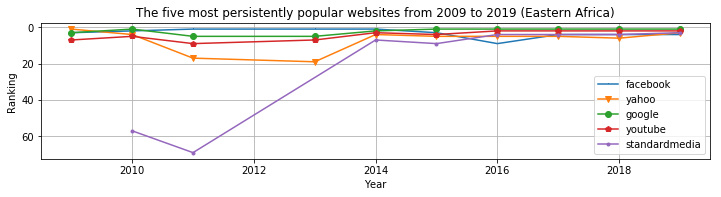

In [61]:
popular = df_top10_ea.stack().value_counts().index[:5]
plotPopular(popular, 'top10_ea', 'Eastern Africa')

#### Northen Africa

In [62]:
df_top10_na = topten(df_top10, na, range(2009,2020))
df_top10_na

,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019
1,facebook,google,facebook,facebook,facebook,facebook,google,youtube,youtube,google
2,google,facebook,google,google,google,google,facebook,google,google,youtube
3,yahoo,yahoo,youtube,youtube,youtube,youtube,youtube,hespress,facebook,chouftv
4,live,youtube,yahoo,yahoo,yahoo,hespress,onclickads,facebook,hespress,ouedkniss
5,youtube,live,live,live,hespress,yahoo,hespress,yahoo,yahoo,facebook
6,maktoob,myegy,maktoob,ouedkniss,ask,ask,yahoo,chouftv,chouftv,speakol
7,msn,msn,hespress,alnilin,amazon,avito,wikipedia,nessma,nessma,hespress
8,kooora,kooora,blogspot,blogspot,blogspot,mosaiquefm,elbalad,albawabhnews,speakol,mosaiquefm
9,rapidshare,maktoob,babylon,ask,avito,alnaharegypt,avito,eskimi,opensooq,yahoo
10,tunisia-sat,echoroukonline,fatakat,alrakoba,live,el-balad,yallakora,ouedkniss,eskimi,live


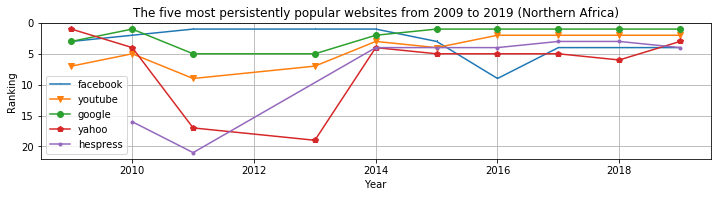

In [63]:
popular = df_top10_na.stack().value_counts().index[:5]
plotPopular(popular, 'top10_na', 'Northern Africa')

#### Southern Africa

In [64]:
df_top10_sa = topten(df_top10, sa, range(2009,2020))
df_top10_sa

,2009,2010,2011,2013,2014,2015,2016,2017,2018,2019
1,google,google,google,google,google,google,google,google,google,google
2,live,facebook,facebook,facebook,facebook,facebook,youtube,youtube,youtube,youtube
3,yahoo,yahoo,youtube,youtube,youtube,youtube,facebook,yahoo,zimeye,facebook
4,facebook,youtube,yahoo,yahoo,linkedin,yahoo,yahoo,facebook,facebook,nyasatimes
5,msn,wikipedia,bidorbuy,gumtree,wikipedia,linkedin,live,zimeye,yahoo,nust
6,youtube,gumtree,gumtree,linkedin,yahoo,gumtree,zimeye,times,nust,zimeye
7,wikipedia,twitter,wikipedia,wikipedia,gumtree,twitter,blogspot,nyasatimes,businesslnk,yahoo
8,blogger,blogger,linkedin,amazon,twitter,amazon,alibaba,wikipedia,nyasatimes,nehandaradio
9,uol,live,twitter,bidorbuy,fnb,wikipedia,movitel,uniswa,uniswa,live
10,gumtree,standardbank,blogspot,blogspot,bidorbuy,fnb,fnb,movitel,live,uniswa


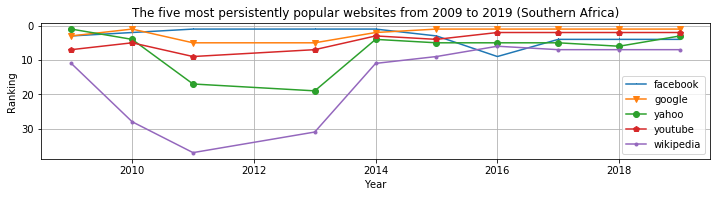

In [65]:
popular = df_top10_sa.stack().value_counts().index[:5]
plotPopular(popular, 'top10_sa', 'Southern Africa')

#### Central Africa

In [66]:
df_top10_ca = topten(df_top10, ca, range(2009,2020))
df_top10_ca

,2009,2011,2014,2016,2017,2018,2019
1,yahoo,yahoo,yahoo,google,google,google,google
2,google,google,google,youtube,youtube,youtube,youtube
3,live,facebook,facebook,facebook,yahoo,yahoo,yahoo
4,msn,youtube,youtube,yahoo,facebook,facebook,mediacongo
5,facebook,bbc,wikipedia,cpasbien,cpasbien,wikipedia,facebook
6,youtube,badoo,ask,wikipedia,wikipedia,eskimi,wikipedia
7,wikipedia,ebay,cameroon-info,ask,mediacongo,mediacongo,premierbet
8,doubleclick,live,paleba,mediacongo,onclkds,informationvine,seeg-gabon
9,microsoft,wikipedia,blogspot,onclickads,ask,emploi,cpasbiens
10,free,amazon,badoo,jumia,jumia,cameroon-info,gabonreview


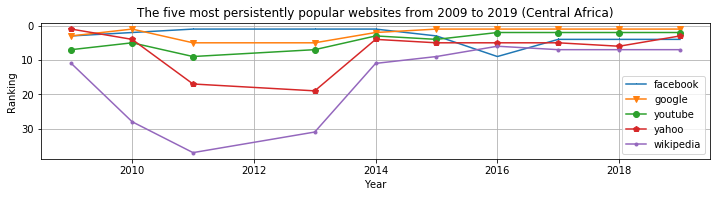

In [67]:
popular = df_top10_ca.stack().value_counts().index[:5]
plotPopular(popular, 'top10_ca', 'Central Africa')

#### Indian Ocean

In [68]:
df_top10_io = topten(df_top10, io, range(2009,2020))
df_top10_io

,2009,2010,2011,2015,2016,2017,2018,2019
1,google,facebook,google,google,youtube,google,google,google
2,yahoo,google,facebook,facebook,google,youtube,youtube,youtube
3,skyrock,yahoo,yahoo,youtube,facebook,facebook,facebook,defimedia
4,facebook,live,youtube,yahoo,lexpress,defimedia,defimedia,facebook
5,live,youtube,leboncoin,leboncoin,msn,uptodown,yahoo,lexpress
6,sobika,msn,live,amazon,yahoo,yahoo,lexpress,yahoo
7,msn,moov,moov,diply,leboncoin,lexpress,wikipedia,inside
8,moov,wikipedia,wikipedia,wikipedia,bing,live,leboncoin,wikipedia
9,youtube,skyrock,orange,ask,ask,leboncoin,bongacams,ac-reunion
10,orange,orange,clicanoo,lexpress,ac-reunion,wikipedia,parcoursup,instagram


Let's see which name persisted in the list of top tens over a given period the longest and plot those names.

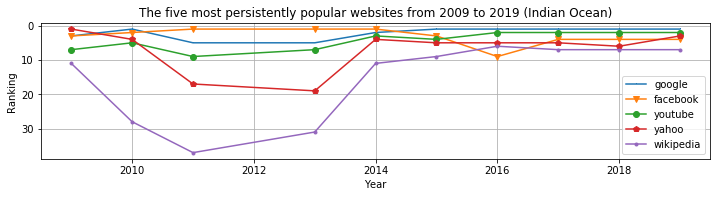

In [69]:
popular = df_top10_io.stack().value_counts().index[:5]
plotPopular(popular, 'top10_io', 'Indian Ocean')